# Impulse Response Functions

Conversely from PDPs and ALEs, impulse response functions (IRFs) are particularly suited for **time series**. They are a key tool in time series analysis, particularly in the context of **vector autoregressive (VAR) models**. They describe the reaction of the system (i.e., the time series) to a temporary shock in one of the variables {cite}`lutkepohl2010impulse`. In the context of electricity markets, IRFs can help us understand how a shock in one factor, such as temperature or demand, impacts electricity prices over time.

In electricity markets, understanding the dynamic relationships between different factors is crucial. For example, a sudden increase in temperature might lead to higher electricity demand due to air conditioning, which in turn could increase electricity prices. IRFs allow us to quantify and visualize these dynamic responses, providing insights into the temporal effects of shocks on the market.

Consider a VAR($p$) model with $k$ variables. The order $p$ determines the number of lagged observations included in the model, reflecting the extent to which past values influence the current value. The model is given by:

\begin{equation}
    \mathbf{y}_t = \mathbf{A}_1 \mathbf{y}_{t-1} + \mathbf{A}_2 \mathbf{y}_{t-2} + \cdots + \mathbf{A}_p \mathbf{y}_{t-p} + \mathbf{u}_t
\end{equation}

where $\mathbf{y}_t$ is a $k \times 1$ vector of time series variables at time $t$, $\mathbf{A}_i$ are the $k \times k$ coefficient matrices, and $\mathbf{u}_t$ is a $k \times 1$ vector of error terms (shocks).

An impulse response function measures the effect of a one-time shock to one of the variables in $\mathbf{u}_t$ on the current and future values of the variables in $\mathbf{y}_t$. 

## Estimation
The estimation of the IRFs is divided into two main steps:
1. **Fit a VAR model**: estimate the coefficients $\mathbf{A}_i$ of the VAR model using the time series data.
2. **Impulse response calculation**: compute the IRFs by iterating the VAR model forward in time, starting from the shock.

In practice, measuring the effect of a shock means to:

1. **Generate a shock**: introduce a one-time shock to one of the variables in the error term vector $\mathbf{u}_t$.
2. **Propagate the shock**: use the estimated VAR model to propagate the shock through the system, calculating the response of each variable in $\mathbf{y}_t$ over time.
3. **Visualize the response**: plot the response of the variables to the shock over time, illustrating the dynamic effects of the shock on the system.

The response of each variable to the shock can be tracked over multiple time periods, providing a comprehensive view of the temporal dynamics within the system. This approach helps in understanding how an initial disturbance affects the system both immediately and in the future, offering valuable insights into the behavior and interactions of the variables in the model.

## What is a Shock
In a VAR model, the error term (often referred to as "shock" or "innovation") represents unexpected changes or disturbances in the system. These are components of the time series that cannot be explained by the past values of the variables in the model. For instance, in an electricity market, the error term for demand could represent unexpected changes in electricity demand due to sudden weather changes, unforeseen industrial activities, or other random events. When we introduce a shock to one of the error terms in the VAR model, we simulate an unexpected change in one of the variables (the one corresponding to the same index of the shock). The IRF then shows us how this shock propagates through the system over time.

Here's how it works step-by-step:

1. **Initial shock**: suppose we introduce a shock to the error term for electricity demand. This means we simulate an unexpected increase or decrease in demand at time $t$.
2. **Immediate effect**: this shock directly impacts the demand variable at time $t$. Since the demand variable is part of the VAR model, this immediate change is reflected in the model's equation for demand.
3. **Propagation through the system**: the change in demand affects future values of demand (due to the autoregressive nature of the model) and can also affect other variables in the system, such as price. This is because the future values of all variables in a VAR model depend on past values of all variables. For example, an increase in demand could lead to an increase in electricity prices due to higher demand pressures. This effect is captured in the VAR model coefficients.
4. **Dynamic responses**: by iterating the VAR model forward in time, the IRF shows how the initial shock to demand affects both demand and price (and potentially other variables) over multiple future time periods.

## Example

Let's consider a VAR(2) model with two variables, demand $D$ and price $P$. The model equations might look like this:

\begin{equation}
\begin{aligned}
    D_t &= a_{10} + a_{11} D_{t-1} + a_{12} P_{t-1} + a_{13} D_{t-2} + a_{14} P_{t-2} + u_{Dt} \\
    P_t &= b_{10} + b_{11} D_{t-1} + b_{12} P_{t-1} + b_{13} D_{t-2} + b_{14} P_{t-2} + u_{Pt}
\end{aligned}
\end{equation}

where $D_t$ and $P_t$ are the demand and price at time $t$, $a_{ij}$ and $b_{ij}$ are the model coefficients, $u_{Dt}$ and $u_{Pt}$ are the error terms (shocks) for demand and price at time $t$.

Step-by-step simulation of a shock:
1. **Introduce a shock**: suppose we introduce a positive shock to $u_{Dt}$ at time $t$, representing an unexpected increase in demand.
2. **Immediate Effect**: this shock increases $D_t$, as $u_{Dt}$ is part of the equation for $D_t$.
3. **Model Iteration**: at time $t+1$, the increased demand $D_t$ affects both $D_{t+1}$ and $P_{t+1}$ through the VAR model equations. The model will show how the increase in $D_t$ (demand) influences $P_{t+1}$ (price) and $D_{t+1}$ (future demand).
4. **Propagation**: this process continues iteratively, showing how the initial shock propagates through time and affects the system.

In summary, the noise or error terms in a VAR model allow us to introduce and **simulate unexpected changes in the variables**. By analyzing how these shocks affect the system over time using IRFs, we can understand the dynamic interactions between variables. This approach provides valuable insights into the **temporal dependencies** and relationships within the system, which are crucial for effective modeling and forecasting in electricity markets.

Let's now consider a practical example in Python, by generating some time-dependent data related to temperature, demand, and price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)
n_samples = 100
time_index = pd.date_range(start='1/1/2020', periods=n_samples, freq='D')
temperature = np.sin(np.linspace(0, 3 * np.pi, n_samples)) + np.random.normal(0, 0.5, n_samples)
demand = np.sin(np.linspace(0, 2 * np.pi, n_samples) + np.pi/4) + np.random.normal(0, 0.5, n_samples)
price = 0.5 * temperature + 0.3 * demand + np.random.normal(0, 0.2, n_samples)

# Create a DataFrame
data = pd.DataFrame({'Temperature': temperature, 'Demand': demand, 'Price': price}, index=time_index)

# Display the first few rows
data.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Temperature,Demand,Price
2020-01-01,0.882026,1.648682,0.861781
2020-01-02,0.295135,0.076651,0.122687
2020-01-03,0.678620,0.155690,0.605949
2020-01-04,1.402179,1.312848,1.225997
2020-01-05,1.305441,0.275470,0.863388


We now proceed with **step 1 of the analysis**, which means to fit a VAR model to the data.

In [2]:
from statsmodels.tsa.api import VAR

# Fit a VAR model
model = VAR(data)
results = model.fit(maxlags=15, ic='aic')

# Print summary of the model
# results.summary()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


We can now move to **step 2**, by introducing shocks in each variable and observing the temporal dependencies and connections among them.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


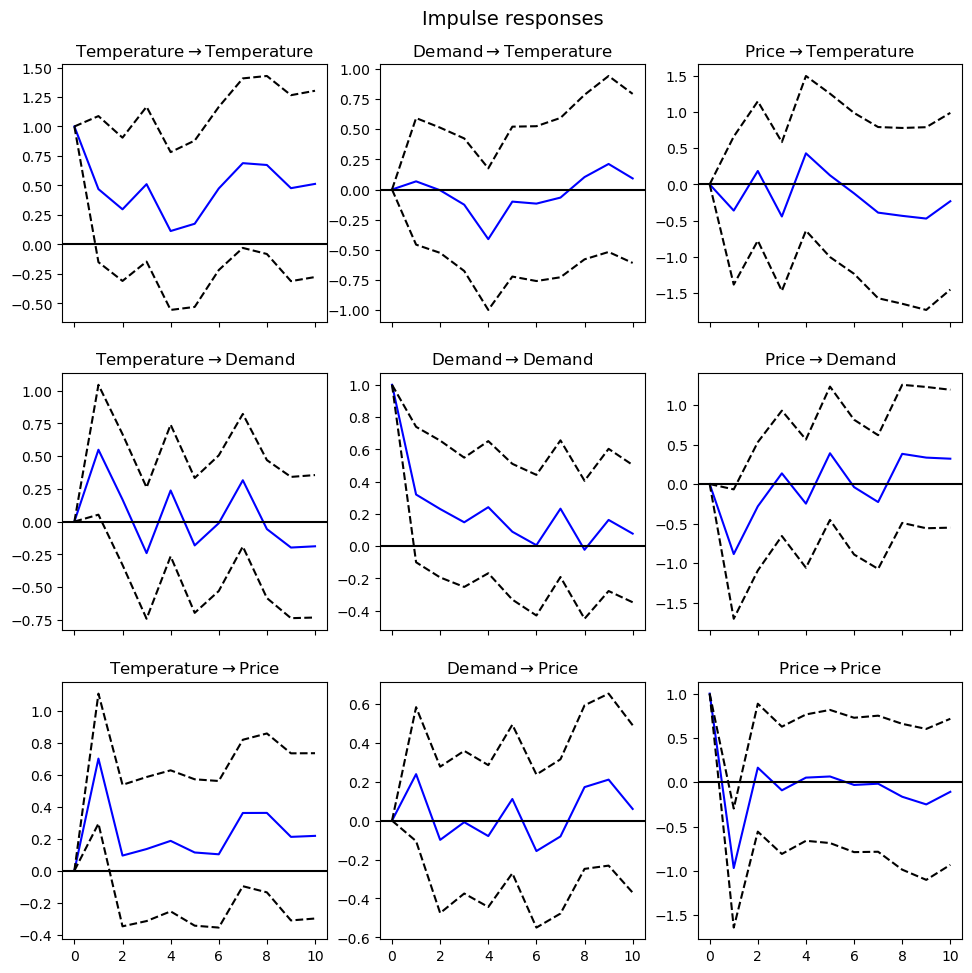

In [3]:
# Compute IRFs
irf = results.irf(10)  # Compute IRFs for 10 periods ahead

# Plot IRFs
irf.plot(orth=False)
plt.show()

Each subplot represents the response of one variable to a one-time shock in another variable (or itself). The blue line indicates the estimated impulse response, while the dashed lines represent the confidence intervals. Generally, a shock to a variable has a significant immediate effect on that variable, which then diminishes over time. Temperature shocks tend to increase demand and price initially, aligning with the expectation that higher temperatures drive up electricity demand and prices. Demand shocks significantly affect both demand and price, reflecting the typical market behavior where increased demand leads to higher prices. Price shocks also impact demand and price, though the effects stabilize over time. These IRFs provide insights into the dynamic interactions in the electricity market, showing how shocks propagate through the system.